# **Construindo um Pipeline ETL com Python - Analisando Desempenho de Escola no ENEM**



Este é um desafio de projeto do **Santander Bootcamp 2023 - Ciência de Dados com Python.**

O projeto toma como base o modelo disponibilizado pela Dio, intitulado **Explorando IA Generativa em um Pipeline de ETL com Python.**
[Clique aqui para ver o notebook do projeto modelo
](https://colab.research.google.com/drive/1SF_Q3AybFPozCcoFBptDSFbMk-6IVGF-?usp=sharing#scrollTo=k5fA5OrXt1a3)

### 🎲 **Entendendo o desafio**

Baseando-se no modelo proposto, o aluno deveria replicar ou imaginar uma pipeline ETL utilizando Python.

### 👨🏽‍💻 **Meu projeto**

##### **Contexto:** Meu desafio é criar uma pipeline ETL para extrair dados de um arquivo CSV disponibilizado por uma escola de ensino médio que gostaria de ter informações sobre o seu desempenho nos últimos 5 (cinco) anos - 2018 a 2022 no Exame Nacional do Ensino Médio (ENEM). Além da extração desses dados, devo realizar algumas transformações simples como cálculo da média por área do conhecimento (Linguagens, Códigos e suas Tecnologias,  Ciências Humanas e suas Tecnologias, Ciências da Natureza e suas Tecnologias, Matemática e suas Tecnologias e a Redação). Por fim, devo realizar o carregamento dos dados transformados em um novo arquivo CSV, além de criar uma visualização gráfica dos resultados.




## **E**xtract

Nesta etapa, vamos extrair os dados de resultados por área do arquivo `dados-enem.csv`. Este arquivo traz informações referentes aos últimos 5 anos (2018 a 2022). As colunas contidas no arquivo são as seguintes: `Área` e `Médias por Ano`. A partir dessas informações vou criar uma DataFrame usando a biblioteca pandas.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
file_path = "dados-enem.csv"
df = pd.read_csv(file_path)

# Visualizar as primeiras linhas do DataFrame para verificar os dados
print(df.head())

         ÁREA   2018   2019   2020   2021   2022
0  LINGUAGENS    540    520    480    490    580
1     HUMANAS    580    590    500    495    680
2   NATUREZAS    610    600    440    510    720
3  MATEMÁTICA    615    610    560    525    710
4     REDAÇÃO    640    625    580    590    730


## **T**ransform

Agora que já temos os dados carregados na fase de Extração, podemos calcular a média de cada área do conhecimento nos últimos 5 anos usando a função `'mean()'` do pandas.



In [115]:
# Calcular a média por área do conhecimento
df['Média'] = df.iloc[:, 1:6].mean(axis=1)

# Selecionar apenas as colunas necessárias
df_transformado = df.iloc[:, [0, -1]]

# Renomear colunas
df_transformado = df_transformado.rename(columns={df.columns[0]: 'Área de Conhecimento', df.columns[-1]: 'Média de Notas'})

# Visualizar o DataFrame transformado
print(df_transformado)

  Área de Conhecimento  Média de Notas
0           LINGUAGENS           522.0
1              HUMANAS           569.0
2            NATUREZAS           576.0
3           MATEMÁTICA           604.0
4              REDAÇÃO           633.0


## **L**oad

Nessa etapa vamos salvar os dados transformados em um novo arquivo CSV e criar um gráfico que possa ser visualizado em tela. Para isso, vou utilizar a biblioteca `matplotlib`.

Dados transformados exportados para media_enem_por_area.csv


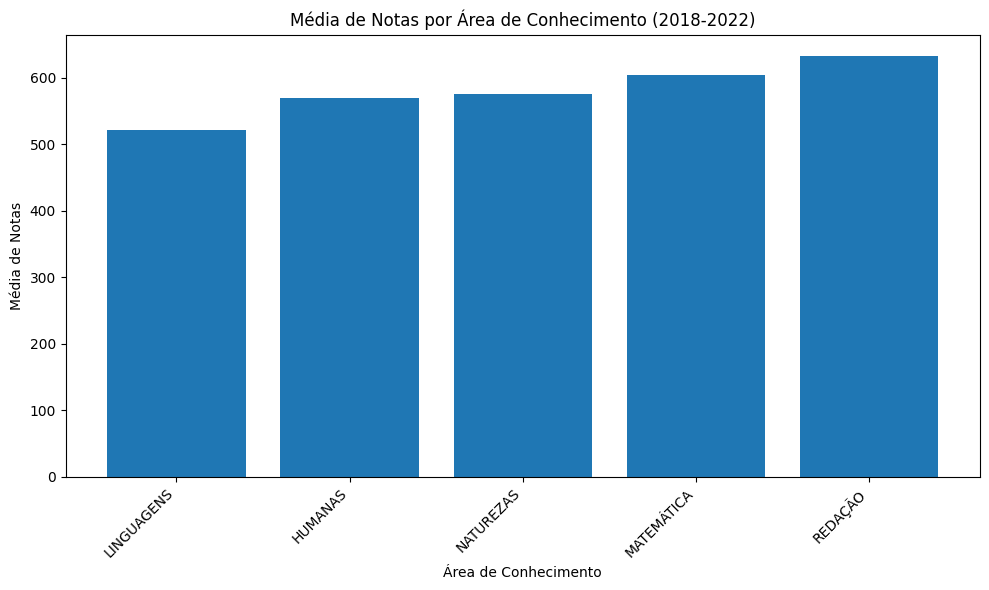

In [116]:
# Exportar o DataFrame transformado para um novo arquivo CSV
output_file_path = "media_enem_por_area.csv"
df_transformado.to_csv(output_file_path, index=False)
print(f'Dados transformados exportados para {output_file_path}')

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_transformado['Área de Conhecimento'], df_transformado['Média de Notas'])

# Configurar título e rótulos
plt.title('Média de Notas por Área de Conhecimento (2018-2022)')
plt.xlabel('Área de Conhecimento')
plt.ylabel('Média de Notas')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()